## Dimensionality Reduction

### 1. What is Dimensionality Reduction?

As data generation and collection keeps increasing, visualizing it and drawing inferences becomes more and more challenging. One of the most common ways of doing visualization is through charts. For instance, the relationship between two variables can be easily visualised through a plot.

For a case in which we have, say 100 variables (p=100), we can have 100(100-1)/2 = 5000 different plots. In such cases where we have a large number of variables, it is better to select a subset of these variables (p<<100) which captures as much information as the original set of variables.

For instance, we have weights of similar objects in Kg (X_1) and Pound (X_2). If we use both of these variables, they will convey similar information. So, it would make sense to use only one variable, i.e., we can convert the data from 2D to 1D.

Reducing p dimensions of the data into a subset of k dimensions (k<<n). This is called dimensionality reduction.

### 2. Why is Dimensionality Reduction required?

- Space required to store the data is reduced as the number of dimensions comes down.

- Less dimensions lead to less computation/training time.

- Some algorithms do not perform well for a large number of dimensions, hence reducing these dimensions needs to happen for these algorithms to be useful.

- It takes care of multicollinearity by removing redundant features. For example, two variables – ‘time spent on treadmill in minutes’ and ‘calories burnt’ are highly correlated as the more time you spend running on a treadmill, the more calories you will burn. Hence, there is no point in storing both as just one of them does what you require.

- It helps in visualizing data. As discussed earlier, it is very difficult to visualize data in higher dimensions so reducing our space to 2D or 3D may allow us to plot and observe patterns more clearly.

### 3. Common Dimensionality Reduction Techniques

- Keeping only the most relevant variables from the original dataset (feature selection)

- Finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables (dimensionality reduction)

### Dataset description

The 2013 sales data for 1559 products across 10 stores of a shop chain in different cities. The data may have missing values as some stores might not report all the data due to technical glitches.

**Dimension:** 8523 items x 12 features for each item

**Variable - Description**

Item_Identifier - Unique product ID

Item_Weight - Weight of product

Item_Fat_Content - Whether the product is low fat or not

Item_Visibility - The percentage of total display area of all products in a store allocated to the particular product

Item_Type - The category to which the product belongs

Item_MRP - Maximum Retail Price (list price) of the product

Outlet_Identifier - Unique store ID

Outlet_Establishment_Year - The year in which store was established

Outlet_Size - The size of the store in terms of ground area covered

Outlet_Location_Type - The type of city in which the store is located

Outlet_Type - Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales - Sales of the product in the particular store. [This is the outcome variable to be predicted.]

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the data
data = pd.read_csv("train.csv")

#### 3.1 Missing Value Ratio

For a given dataset, the first naturally step is exploring the data. If the dataset has some missing values, it is recommended to find out the reason for these missing values and then impute them or drop the variables entirely which have missing values (using appropriate methods).

If too many values are missing (more than 50%, for instance), should the missing values be inputed or should the variable be dropped? In many cases, dropping the variable is recommendable, since it will not infer much information about the data. To be more precise, a threshold value can be set and if the percentage of missing values in any variable is greater than the threshold, the variable is dropped.

In [3]:
# first, check the percentage of missing values in each variable
missing_percentage = data.isnull().sum()/len(data)*100
missing_percentage

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Depending on the dataset, a percentage threshold can be established and variables having more than that percentage of missing values can be droppped.

We will work with a threshold of 20%.

In [4]:
acceptable_features = missing_percentage[missing_percentage <= 20]
data_acceptable = data[acceptable_features.index]

#### 3.2 Low Variance Filter

Consider a variable where all the observations have the same value, say 1. Using this variable has no benefit on the model, since the variance is null.

Hence, it is a good idea to drop the variables having low variance as compared to other variables in the dataset. Variables with a low variance will not affect the target variable.

**First, fill the missing values**; available options for numerical data: *mean, median, mode*.

In [5]:
# fill missing values using the mean
data_acceptable = data_acceptable.fillna(data_acceptable.mean())

In [6]:
# fill missing values using the median
#data_acceptable = data_acceptable.fillna(data_acceptable.median())

In [7]:
# fill missing values using the mode
#data_acceptable = data_acceptable.fillna(data_acceptable.mode()[0])

In [8]:
# check if all missing values have been filled
data_acceptable.isnull().sum()/len(data_acceptable)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [9]:
# compute the variance of numerical variables
variance = data_acceptable.var()
variance

Item_Weight                  1.786012e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [10]:
# drop the features having the variance lower than a given threshold, i.e. 10
non_acceptable_features = variance[variance <= 10]
data_useful = data_acceptable.drop(non_acceptable_features.index, axis = 1)
data_useful.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### 3.3 High Correlation Filter

High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance).

We compute the correlation between independent numerical variables that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind).

**General guideline**: keep those variables having a decent or high correlation with the target variable.

If we need to train a model for estimating one variable (called *dependent variable*, e.g. Item_Outlet_Sales), we should first eliminate it from the training dataset and save the remaining variables in a new dataframe (data_independent_variables).

In [11]:
# eliminate the dependent variable and compute the correlation table
data_independent_variables = data_useful.drop('Item_Outlet_Sales', axis = 1)
data_independent_variables.corr()

,Item_Weight,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,0.024756,-0.008301
Item_MRP,0.024756,1.000000,0.005020
Outlet_Establishment_Year,-0.008301,0.005020,1.000000


A *high correlation* between a pair of variables (features) is usually considered to be greater than 0.5-0.6 as an absolute value. Note that the considered dataset has no high correlation variables.

#### 3.4 Random Forest

Random Forest is one of the most widely used algorithms for feature selection. It helps select a smaller subset of features.

The data must be converted into numeric form by applying one hot encoding, as Random Forest (Scikit-Learn Implementation) takes only numeric inputs.

The ID variables (Item_Identifier and Outlet_Identifier) should be dropped as these are just unique numbers and hold no significant importance. Also, the dependent variable (Item_Outlet_Sales) should be dropped.

In [12]:
from sklearn.ensemble import RandomForestRegressor
data_rf = data_useful.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis = 1) 
model = RandomForestRegressor(random_state = 1, max_depth = 10)
data_rf = pd.get_dummies(data_rf)
model.fit(data_rf,data_useful.Item_Outlet_Sales)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

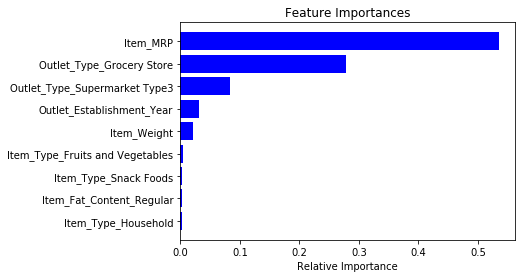

In [13]:
features = data_rf.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### 3.5 Backward Feature Elimination

- Take all the *n* variables present in the dataset and train the model using them
- Compute the performance of the model
- Compute the performance of the model after eliminating each variable (*n* times), i.e., dropping one variable every time and training the model on the remaining *n-1* variables
- Identify the variable whose removal has produced the smallest (or no) change in the performance of the model, and then drop that variable
- Repeat this process until no variable can be dropped

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#only use numeric features
data_n = data_acceptable.select_dtypes(include = np.number)

# separate the target and independent variable
X = data_n.drop(columns = ['Item_Outlet_Sales'], axis=1)
Y = data_n['Item_Outlet_Sales']

# create the object of the model
lreg = LinearRegression()

# specify the number of  features to select (e.g., 3)
rfe = RFE(lreg, 3)

# fit the model
rfe = rfe.fit(X, Y)

print('Selected features:')
print(rfe.support_)

print('Features ranking:')
print(rfe.ranking_)

print(X.columns)

Selected features:
[False  True  True  True]
Features ranking:
[2 1 1 1]
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


#### 3.6 Forward Feature Selection

- Start with a single feature. Essentially, the model is trained *n* number of times using each feature separately
- The variable giving the best performance is selected as the starting variable
- Repeat this process and add one variable at a time. The variable that produces the highest increase in performance is retained
- Repeat this process until no significant improvement is seen in the model’s performance

In [15]:
from sklearn.feature_selection import f_regression
#df = pd.read_csv('train.csv')
#df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
ffs = f_regression(data_n,data.Item_Outlet_Sales)
variable = [ ]
for i in range(0,len(data_n.columns)-1):
    if ffs[0][i] >=10:
       variable.append(data_n.columns[i])
variable

['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

This returns an array containing the F-values of the variables and the p-values corresponding to each F value. Refer to this link [https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/f-statistic-value-test/] to learn more about F-values. For our purpose, we will select the variables having F-value greater than 10.